In [ ]:
# STEPS FOR PCA #

# 1) Standardize the data: Standardize the range of the initial variables so that they all contribute equally to the analysis. 
# This prevents variables with larger ranges from dominating the analysis. 
# 2) Compute the covariance matrix: Identify correlations by computing the covariance matrix. 
# 3) Compute the eigenvectors and eigenvalues: Identify the principal components by computing the eigenvectors and eigenvalues of the covariance matrix. 
# 4) Create a feature vector: Decide which principal components to keep by creating a feature vector. 
# 5) Recast the data: Recast the data along the principal components axes. 


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
wine_data = pd.read_csv('Wine.csv')
wine_data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


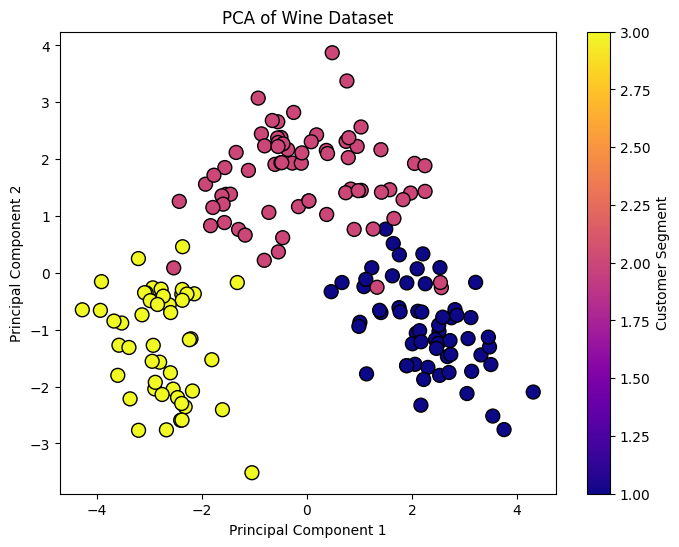

Explained variance by the 2 principal components: [0.36198848 0.1920749 ]


In [9]:
# Separating features and the target
X = wine_data.drop(columns=['Customer_Segment'])  # Feature matrix
y = wine_data['Customer_Segment']  # Target labels (Wine type)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce the dimensionality
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Adding the target wine type to the DataFrame
principal_df['Customer_Segment'] = y

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], 
            c=principal_df['Customer_Segment'], cmap='plasma', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Customer Segment')
plt.show()

# Explained variance to see how much information is captured by the principal components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by the 2 principal components: {explained_variance}')
